In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import graphviz as gv
import matplotlib.pyplot as plt

In [41]:
dados = pd.read_csv('DATA/Customer-Churn.csv')

In [42]:
dados.shape

(7043, 18)

In [43]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [44]:
#modificação manual
traducao_dic = {'Sim' : 1, 'Nao': 0}

dadosmodificados = dados [['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

C:\Users\Henrique\AppData\Local\Temp\ipykernel_17000\1375580784.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dadosmodificados = dados [['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)


,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [45]:
#modificação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))

dummie_dados.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
1,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
2,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True
4,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False


In [46]:
#modificação manual
traducao_dic = {True : 1, False: 0}

dummie_dados = dummie_dados.replace(traducao_dic)
dummie_dados.head()

C:\Users\Henrique\AppData\Local\Temp\ipykernel_17000\172504050.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummie_dados = dummie_dados.replace(traducao_dic)


,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [47]:
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [48]:
dados_final.shape

(7043, 39)

In [49]:
pd.set_option('display.max_columns', 39)

In [50]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


Yi = F(Xi)

In [51]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]


ymaria = ?

C:\Users\Henrique\AppData\Local\Temp\ipykernel_17000\41439956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=dados_final, palette='hls')


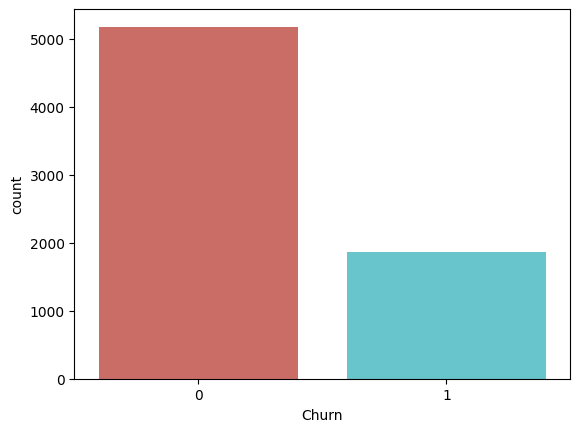

In [53]:
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final, palette='hls')

In [54]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [55]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [56]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


C:\Users\Henrique\AppData\Local\Temp\ipykernel_17000\3518605614.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=dados_final, palette='hls')  # plotando a variável target balanceada.


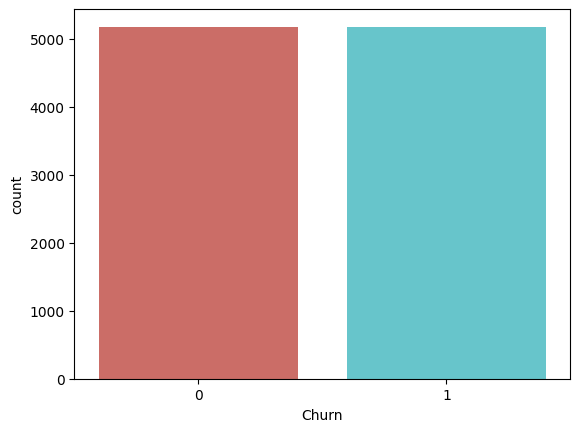

In [60]:
ax = sns.countplot(x='Churn', data=dados_final, palette='hls')  # plotando a variável target balanceada.

In [61]:
x = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [62]:
from sklearn.preprocessing import StandardScaler

In [64]:
norm = StandardScaler()

x_normalizado = norm.fit_transform(x)
x_normalizado

array([[ 1.26516933, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       [-0.79040803, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       [-0.79040803, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       ...,
       [-0.79040803, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       [-0.79040803, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47882211, -0.4360152 ],
       [-0.79040803, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47882211, -0.4360152 ]])

In [65]:
x_normalizado[0]

array([ 1.26516933, -0.52756038, -3.06083934,  0.81449258, -0.41350409,
       -1.10772423, -1.32176271, -0.88482108,  3.18604176, -0.83350255,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
       -0.51766965, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
       -0.44617598, -0.64211419,  0.87979784, -0.44617598, -0.52411659,
        1.18643645, -0.44617598, -0.77723381,  1.20359927, -0.44617598,
       -0.78976268, -0.44648735,  0.73788726, -0.41989297, -0.42576817,
        1.30292044, -0.47882211, -0.4360152 ])

In [66]:
xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns=x.columns))
xmaria_normalizado

array([[-0.79040803, -0.52756038,  0.32670777,  0.81449258, -0.41350409,
        -1.14938871, -0.97235545,  1.13017199, -0.31386908, -0.83350255,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.51766965, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
         2.24126814, -0.64211419, -1.13662476,  2.24126814, -0.52411659,
         1.18643645, -0.44617598, -0.77723381, -0.83084131, -0.44617598,
         1.26620316, -0.44648735, -1.35522058,  2.38155929, -0.42576817,
        -0.76750657, -0.47882211,  2.293498  ]])

In [67]:
a = xmaria_normalizado

In [68]:
b = x_normalizado[0]

In [69]:
a - b

array([[-2.05557736,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.04166448,  0.34940726,  2.01499307, -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01642259,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03444059,  0.        ,
         2.05596584,  0.        , -2.09310784,  2.80145225,  0.        ,
        -2.07042701,  0.        ,  2.72951321]])

In [70]:
np.square(a - b)

array([[4.22539829e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73592848e-03, 1.22085433e-01, 4.06019707e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06596007e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13894850e+00, 0.00000000e+00, 4.22699553e+00, 0.00000000e+00,
        4.38110042e+00, 7.84813473e+00, 0.00000000e+00, 4.28666801e+00,
        0.00000000e+00, 7.45024235e+00]])

In [71]:
np.sum(np.square(a - b))

91.70964061494814

In [72]:
np.sqrt(np.sum(np.square(a - b)))

9.57651505585138

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_treino, X_teste, y_treino, y_teste = train_test_split(x_normalizado, y, test_size=0.3, random_state=123)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier(metric='euclidean')

In [77]:
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [78]:
predict_knn = knn.predict(X_teste)

In [79]:
predict_knn

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [81]:
def calcula_distancia(dados_clientes, dados_maria, numero_clientes):
    distancias = []

#loop para percorrer cliente por cliente
    for i in range(numero_clientes):
        dist1 = dados_maria - dados_clientes[i]            #subtração dos atributos
        soma_quadrado = np.sum(np.square(dist1))    #exponenciação e soma de todos os atributos
        distancias.append(np.sqrt(soma_quadrado))   #raiz quadrada da soma anterior

    return distancias

calcula_distancia(x_normalizado, xmaria_normalizado, 10)

[9.57651505585138,
 9.164728228563732,
 8.497172521585334,
 10.03739603459508,
 7.802848601333239,
 9.01153896426902,
 8.970117592711834,
 10.634933754682956,
 9.45029860432374,
 7.919820360602932]